In [82]:
import matplotlib.pyplot as plt
import json
import random

# set seed for reproducibility
random.seed(0)

In [83]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
plt.style.use('./graphics/matteo.mplstyle')
for font in font_manager.findSystemFonts("./graphics"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
rcParams['axes.unicode_minus'] = False

colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61']

## reservoir py

In [84]:
from datetime import datetime

def parse_to_ms(timestamp_str):
    """
    Parse a timestamp string into milliseconds since the epoch.

    Args:
        timestamp_str (str): The timestamp in the format 'YYYY-MM-DD HH:MM:SS,fff'.

    Returns:
        int: The timestamp in milliseconds since the epoch.
    """
    # Parse the timestamp string into a datetime object
    dt = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S,%f")
    # Get the time in seconds since the epoch and convert to milliseconds
    return int(dt.timestamp())

# Example usage
timestamp_str = "2025-01-21 22:26:15,498"
milliseconds = parse_to_ms(timestamp_str)
print(milliseconds)

1737494775


In [85]:
import re

_log_line = "[I 2025-01-21 22:26:15,498] Trial 0 finished with value: 0.9250699311843222 and parameters: {'units': 500, 'sr': 0.24382201147723448, 'mu': 0.2352480739859275, 'input_scaling': 0.0045535018937291555, 'learning_rate': 8.1032606148942e-05, 'connectivity': 0.14994149291891887, 'activation': 'tanh', 'ridge': 2.6874506039968837e-05}. Best is trial 0 with value: 0.9250699311843222."

def extract_optuna_units(log_line):
    # Regex to extract timestamp and value
    # regex = r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*?value: ([0-9]*\.?[0-9]+)"
    # regex = r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*?value: (-?[0-9]*\.?[0-9]+)"
    regex = r"'units': (\d+)"

    matches = re.search(regex, log_line)
    if matches:
        units = matches.group(1)
        return units

    return None, None

# Example usage
units = extract_optuna_units(_log_line)
print(units)

500


In [86]:
reservoirpy_base_path = "/home/matteo/Documents/postDoc/CTTC/IJCNN2025/data/airQuality/reports/hyperopt-multiscroll"
reservoirpy_order = [
    "19.1040094_hyperopt_results_1call.json",
    "19.4299005_hyperopt_results_1call.json",
    "19.3110295_hyperopt_results_1call.json",
    "64.1363225_hyperopt_results_1call.json",
    "22.3673689_hyperopt_results_1call.json",
    "66.5116675_hyperopt_results_1call.json",
    "79.7027016_hyperopt_results_1call.json",
    "81.3181527_hyperopt_results_1call.json",
    "52.4195170_hyperopt_results_1call.json",
    "46.0655802_hyperopt_results_1call.json",
    "1343.8000626_hyperopt_results_1call.json",
    "82.4709837_hyperopt_results_1call.json",
    "20.1473743_hyperopt_results_1call.json",
    "19.9969867_hyperopt_results_1call.json",
    "81.6479569_hyperopt_results_1call.json",
    "26.6948026_hyperopt_results_1call.json",
    "81.6279726_hyperopt_results_1call.json",
    "46.0521590_hyperopt_results_1call.json",
    "37.5799446_hyperopt_results_1call.json",
    "26.7594871_hyperopt_results_1call.json",
]

In [87]:
reservoirpy_units = []
for reservoirpy_file in reservoirpy_order:
    with open(f"{reservoirpy_base_path}/{reservoirpy_file}", "r") as f:
        reservoirpy_data = json.load(f)
        # if reservoirpy_data["returned_dict"]["r2"] < 0:
        #     continue
        reservoirpy_units += [reservoirpy_data["current_params"]["N"]] 

## optuna

In [88]:
optuna_units = []

# read file /home/matteo/Documents/postDoc/CTTC/IJCNN2025/data/airQuality/reports/output_hyperband.log line by line
# for each line, extract the timestamp and the r2 value

hyperband_base_path = "/home/matteo/Documents/postDoc/CTTC/IJCNN2025/data/airQuality/reports"
hyperband_file = "output_hyperband.log"

hyperband_r2s = []
with open(f"{hyperband_base_path}/{hyperband_file}", "r") as f:
    for line in f:
        if line.startswith("[I") and "Trial" in line:
            units = extract_optuna_units(line)
            if units is not None:
                optuna_units += [int(units)] 


In [89]:
mab = [{'units': 50, 'sr': 2.81911690091882, 'mu': 0.5825664462634468, 'input_scaling': 5.274988084904228e-05, 'learning_rate': 0.006245029216272629, 'connectivity': 0.11335916657459709, 'activation': 'sigmoid', 'ridge': 3.759898064732164e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 2.4703102797128125, 'mu': 0.5382313954806422, 'input_scaling': 5.211274729591929e-05, 'learning_rate': 0.006479164579398876, 'connectivity': 0.18447463995433022, 'activation': 'sigmoid', 'ridge': 3.37026965719773e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 2.2690175902432412, 'mu': 0.5644898556055609, 'input_scaling': 4.289770208808214e-05, 'learning_rate': 0.005857020177895457, 'connectivity': 0.14306431597118027, 'activation': 'tanh', 'ridge': 3.4733659056809653e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 2.9176822884148024, 'mu': 0.6230957241091389, 'input_scaling': 5.597721589978357e-05, 'learning_rate': 0.005866863577262475, 'connectivity': 0.1, 'activation': 'sigmoid', 'ridge': 3.8577970046514764e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 3.16769782843287, 'mu': 0.6167557922594891, 'input_scaling': 5.086620167579745e-05, 'learning_rate': 0.0063025154290551905, 'connectivity': 0.2135348354031233, 'activation': 'sigmoid', 'ridge': 3.3998264754466116e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.013674910322911658, 'mu': 0.3913330983110862, 'input_scaling': 0.6475521609567921, 'learning_rate': 3.645119038418592e-05, 'connectivity': 0.22894516880577115, 'activation': 'sigmoid', 'ridge': 4.940464028644735e-05, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 3.0722498058244536, 'mu': 0.6342010182955171, 'input_scaling': 5.451111076235679e-05, 'learning_rate': 0.005778748454672978, 'connectivity': 0.10190277525594583, 'activation': 'sigmoid', 'ridge': 3.0573437265931504e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 1.1282457986495034, 'mu': 0.06619437560305197, 'input_scaling': 0.0008581487892097754, 'learning_rate': 0.0001329677492243974, 'connectivity': 0.22953836524020776, 'activation': 'tanh', 'ridge': 0.006811512184442477, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 2.9563099260789736, 'mu': 0.5853783491406175, 'input_scaling': 5.264365593328317e-05, 'learning_rate': 0.006685293611230701, 'connectivity': 0.1, 'activation': 'sigmoid', 'ridge': 3.8269323804867463e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 500, 'sr': 2.863378931641239, 'mu': 0.5266806634646469, 'input_scaling': 4.60544506966878e-05, 'learning_rate': 0.006346515360981183, 'connectivity': 0.11921128230309973, 'activation': 'sigmoid', 'ridge': 3.001988523597657e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.022777924028776517, 'mu': 0.0401908053497223, 'input_scaling': 0.001247588725303023, 'learning_rate': 0.0005861647963512337, 'connectivity': 0.41878897035446727, 'activation': 'sigmoid', 'ridge': 6.222517441041846e-05, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 1.1090135816957996, 'mu': 0.3970803151489598, 'input_scaling': 9.172933615956422e-05, 'learning_rate': 0.0002076500677573264, 'connectivity': 0.169032060976425, 'activation': 'sigmoid', 'ridge': 0.0032550198169283666, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5000, 'sr': 2.970476776056184, 'mu': 0.6002535848125236, 'input_scaling': 5.8006635788228515e-05, 'learning_rate': 0.006848374652821762, 'connectivity': 0.10930975318012637, 'activation': 'sigmoid', 'ridge': 4.263647546321713e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 2.740721894768684, 'mu': 0.5239068036456217, 'input_scaling': 4.106051357723219e-05, 'learning_rate': 0.006985822154925043, 'connectivity': 0.1, 'activation': 'sigmoid', 'ridge': 2.90506514441957e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.20759254997408944, 'mu': 0.09644335838012641, 'input_scaling': 0.766961798495379, 'learning_rate': 8.507566437849275e-05, 'connectivity': 0.41837029249549995, 'activation': 'sigmoid', 'ridge': 7.043356503152901, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 2.436625199355549, 'mu': 0.6556165089544236, 'input_scaling': 6.482447663945435e-05, 'learning_rate': 0.005861088997836332, 'connectivity': 0.10576478168307508, 'activation': 'sigmoid', 'ridge': 3.2597957572516053e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 500, 'sr': 0.13113265050187564, 'mu': 0.6027251599453806, 'input_scaling': 0.015725743329187185, 'learning_rate': 1.906960618803301e-05, 'connectivity': 0.4163382051655137, 'activation': 'tanh', 'ridge': 0.5105352952614214, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 500, 'sr': 2.0037688427758327, 'mu': 0.5710180425413853, 'input_scaling': 5.388158586908503e-05, 'learning_rate': 0.005673134169884077, 'connectivity': 0.26062243544705055, 'activation': 'sigmoid', 'ridge': 3.545679514766852e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 3.080748029612969, 'mu': 0.5543044510631249, 'input_scaling': 5.950234505264158e-05, 'learning_rate': 0.006393018359013748, 'connectivity': 0.2583122912572, 'activation': 'tanh', 'ridge': 3.888944506980739e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 2.7892602106260473, 'mu': 0.7189672464841301, 'input_scaling': 0.08051268627902022, 'learning_rate': 2.16704029090176e-05, 'connectivity': 0.38684200359262466, 'activation': 'sigmoid', 'ridge': 3.5685818887790695e-07, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}]
mab_units = [d["units"] for d in mab]

# occupancy

In [90]:
reservoirpy_base_path = "/home/matteo/Documents/postDoc/CTTC/IJCNN2025/data/occupancy/reports/hyperopt-multiscroll"
reservoirpy_order = [
    "-0.8078759_hyperopt_results_1call.json",
    "-0.9563008_hyperopt_results_1call.json",
    "-0.7920193_hyperopt_results_1call.json",
    "-0.3036649_hyperopt_results_1call.json",
    "-0.9684211_hyperopt_results_1call.json",
    "-0.9560440_hyperopt_results_1call.json",
    "-0.0000000_hyperopt_results_1call.json",
    "-0.0000000_hyperopt_results_2call.json",
    "-0.9174026_hyperopt_results_1call.json",
    "-0.9709419_hyperopt_results_1call.json",
    "-0.6447124_hyperopt_results_1call.json",
    "-0.0061224_hyperopt_results_1call.json",
    "-0.8184506_hyperopt_results_1call.json",
    "-0.8030751_hyperopt_results_1call.json",
    "-0.0000000_hyperopt_results_3call.json",
    "-0.9670330_hyperopt_results_1call.json",
    "-0.0000000_hyperopt_results_4call.json",
    "-0.8265525_hyperopt_results_1call.json",
    "-0.8590308_hyperopt_results_1call.json",
    "-0.9672214_hyperopt_results_1call.json",
]

reservoirpy_occupancy_units = []
for reservoirpy_file in reservoirpy_order:
    with open(f"{reservoirpy_base_path}/{reservoirpy_file}", "r") as f:
        reservoirpy_data = json.load(f)
        # if reservoirpy_data["returned_dict"]["r2"] < 0:
        #     continue
        reservoirpy_occupancy_units += [reservoirpy_data["current_params"]["N"]]

In [91]:
optuna_occupancy_units = []

# read file /home/matteo/Documents/postDoc/CTTC/IJCNN2025/data/airQuality/reports/output_hyperband.log line by line
# for each line, extract the timestamp and the r2 value

hyperband_base_path = "/home/matteo/Documents/postDoc/CTTC/IJCNN2025/data/occupancy/reports"
hyperband_file = "search_optuna.log"

hyperband_r2s = []
with open(f"{hyperband_base_path}/{hyperband_file}", "r") as f:
    for line in f:
        if line.startswith("[I") and "Trial" in line:
            units = extract_optuna_units(line)
            if units is not None:
                optuna_occupancy_units += [int(units)]

In [92]:
mab_occupancy = [{'units': 50, 'sr': 0.47802425164256224, 'mu': 0.6486543384735453, 'input_scaling': 15.006743037910717, 'learning_rate': 2.3847180715116276e-05, 'connectivity': 0.34579098457771185, 'activation': 'sigmoid', 'ridge': 2.653201625223424, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.5480455083569228, 'mu': 0.6871257075604194, 'input_scaling': 12.968937884611577, 'learning_rate': 2.6694848265447476e-05, 'connectivity': 0.4024849949362914, 'activation': 'sigmoid', 'ridge': 2.706835003583254, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 2.848302940277993, 'mu': 0.3308593825901337, 'input_scaling': 0.00014468945502806626, 'learning_rate': 0.00017487722780592298, 'connectivity': 0.11766743023391829, 'activation': 'tanh', 'ridge': 1.9462474347608099, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.5317343509644359, 'mu': 0.622015273295188, 'input_scaling': 15.71797720016865, 'learning_rate': 2.7433270487637415e-05, 'connectivity': 0.2697316760211913, 'activation': 'sigmoid', 'ridge': 2.8871529335457646, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.45262688236552495, 'mu': 0.6896815340399265, 'input_scaling': 17.7111731294168, 'learning_rate': 2.1067212525665693e-05, 'connectivity': 0.3380450258007449, 'activation': 'sigmoid', 'ridge': 2.647078930925056, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.5331839922445265, 'mu': 0.6863963829528114, 'input_scaling': 16.3089638092942, 'learning_rate': 3.2727432683656645e-05, 'connectivity': 0.25926009749949885, 'activation': 'sigmoid', 'ridge': 3.027960493947056, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.48739493455169236, 'mu': 0.6884106011660388, 'input_scaling': 16.829928785733756, 'learning_rate': 3.1809227340653e-05, 'connectivity': 0.16560164844795824, 'activation': 'sigmoid', 'ridge': 2.5019381939149232, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.5604197195375689, 'mu': 0.6650410630465714, 'input_scaling': 17.129547797312615, 'learning_rate': 2.8206381587573223e-05, 'connectivity': 0.3426355687100396, 'activation': 'sigmoid', 'ridge': 2.704079360465343, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.5335839696662258, 'mu': 0.6441121950838978, 'input_scaling': 14.953328820571608, 'learning_rate': 2.6750954229461066e-05, 'connectivity': 0.279561620173935, 'activation': 'sigmoid', 'ridge': 3.144862681298261, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.03550121425202388, 'mu': 0.4880639897191217, 'input_scaling': 33.52635862567224, 'learning_rate': 0.008846924331729273, 'connectivity': 0.2615540829570802, 'activation': 'tanh', 'ridge': 1.0742680387450009e-08, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 1.9272949454489658, 'mu': 0.9060034109155178, 'input_scaling': 142.17580810329605, 'learning_rate': 7.686830852357585e-05, 'connectivity': 0.10926420541764484, 'activation': 'tanh', 'ridge': 0.0001529935266081923, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.5800139952462097, 'mu': 0.5630660655053971, 'input_scaling': 14.084152116439498, 'learning_rate': 2.9784990330147096e-05, 'connectivity': 0.33084286193238616, 'activation': 'sigmoid', 'ridge': 2.849474699273503, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.5799321972944831, 'mu': 0.5414274493804957, 'input_scaling': 15.278582961487727, 'learning_rate': 2.7534925819115722e-05, 'connectivity': 0.29740979390887373, 'activation': 'sigmoid', 'ridge': 3.240760201995017, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.5862153847781783, 'mu': 0.7385803546887788, 'input_scaling': 17.446256718679127, 'learning_rate': 2.668125689930613e-05, 'connectivity': 0.26813432512194396, 'activation': 'sigmoid', 'ridge': 2.2499436515445628, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.42940080175858425, 'mu': 0.7102774176189919, 'input_scaling': 15.90134215281613, 'learning_rate': 2.5657091855940506e-05, 'connectivity': 0.4079178258697576, 'activation': 'sigmoid', 'ridge': 2.6388127377362762, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 7.120016891989412, 'mu': 0.3361288141467693, 'input_scaling': 0.386772726281336, 'learning_rate': 0.001983084966990718, 'connectivity': 0.39605482510458145, 'activation': 'tanh', 'ridge': 0.0010710334958042244, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 5, 'sr': 0.6218110034559591, 'mu': 0.6635229354415697, 'input_scaling': 15.059520206543258, 'learning_rate': 2.5281562327184245e-05, 'connectivity': 0.35569872735305785, 'activation': 'sigmoid', 'ridge': 2.69018613780792, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 500, 'sr': 0.4758883716570615, 'mu': 0.6494108043782528, 'input_scaling': 16.91541738557945, 'learning_rate': 3.0542535323453134e-05, 'connectivity': 0.2432060247602103, 'activation': 'sigmoid', 'ridge': 3.393287571413253, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.45702260115988, 'mu': 0.6630103906639476, 'input_scaling': 15.52774988540209, 'learning_rate': 2.4435014358278942e-05, 'connectivity': 0.38973532922572046, 'activation': 'sigmoid', 'ridge': 2.3695402394747638, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}, {'units': 50, 'sr': 0.6108010631997716, 'mu': 0.7355939769982943, 'input_scaling': 15.288173837519913, 'learning_rate': 2.585598838629524e-05, 'connectivity': 0.23626709862885203, 'activation': 'tanh', 'ridge': 3.1833358036107593, 'epochs': 100, 'warmup': 100, 'seed': 12345, 'n_instances': 5}]
mab_occupancy_units = [d["units"] for d in mab_occupancy]

[[5, 3, 8], [2, 3, 8], [9, 11, 3], [4, 3, 1]]


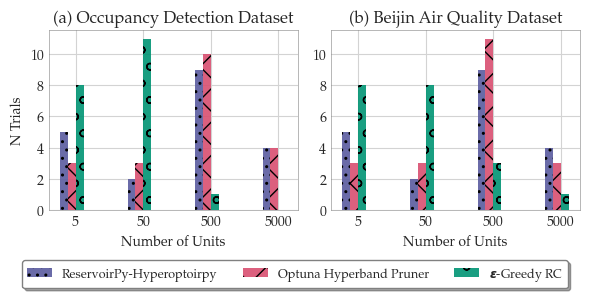

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the groups
# groups = [
#     "Beijin Air Quality Dataset",
#     "Occupancy Detection Dataset"
# ]

groups = [
    "5",
    "50",
    "500",
    "5000",
]

reservoirpy_units_5 = len([u for u in reservoirpy_units if u == 5])
reservoirpy_units_50 = len([u for u in reservoirpy_units if u == 50])
reservoirpy_units_500 = len([u for u in reservoirpy_units if u == 500])
reservoirpy_units_5000 = len([u for u in reservoirpy_units if u == 5000])

optuna_units_5 = len([u for u in optuna_units if u == 5])
optuna_units_50 = len([u for u in optuna_units if u == 50])
optuna_units_500 = len([u for u in optuna_units if u == 500])
optuna_units_5000 = len([u for u in optuna_units if u == 5000])

mab_units_5 = len([u for u in mab_units if u == 5])
mab_units_50 = len([u for u in mab_units if u == 50])
mab_units_500 = len([u for u in mab_units if u == 500])
mab_units_5000 = len([u for u in mab_units if u == 5000])

reservoirpy = []

# Data for CPU and RAM usage
metrics = ["reservoirpy", "optuna", "mab"]
mean_values = [
    [reservoirpy_units_5, optuna_units_5, mab_units_5],
    [reservoirpy_units_50, optuna_units_50, mab_units_50],
    [reservoirpy_units_500, optuna_units_500, mab_units_500],
    [reservoirpy_units_5000, optuna_units_5000, mab_units_5000],
]

print(mean_values)

# Colors for the bars
colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61', '#B565A7', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7']
hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
]
# Parameters for the histograms
x = np.arange(len(groups))  # group positions
width = 0.35  # width of the bars

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plot 1: CPU and RAM usage
ax = axes[1]
for i, metric in enumerate(metrics):
    ax.bar(
        x - width / 2 + i * (width / len(metrics)),
        [m[i] for m in mean_values],
        width / len(metrics),
        label=metric,
        capsize=5,
        color=colors[i],
        hatch=hatchs[i],
        alpha=0.9
    )

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_title("(b) Beijin Air Quality Dataset")
ax.set_xlabel("Number of Units")

# --------------------------------------------------------------

reservoirpy_occupancy_units_5 = len([u for u in reservoirpy_occupancy_units if u == 5])
reservoirpy_occupancy_units_50 = len([u for u in reservoirpy_occupancy_units if u == 50])
reservoirpy_occupancy_units_500 = len([u for u in reservoirpy_occupancy_units if u == 500])
reservoirpy_occupancy_units_5000 = len([u for u in reservoirpy_occupancy_units if u == 5000])

optuna_occupancy_units_5 = len([u for u in optuna_occupancy_units if u == 5])
optuna_occupancy_units_50 = len([u for u in optuna_occupancy_units if u == 50])
optuna_occupancy_units_500 = len([u for u in optuna_occupancy_units if u == 500])
optuna_occupancy_units_5000 = len([u for u in optuna_occupancy_units if u == 5000])

mab_occupancy_units_5 = len([u for u in mab_occupancy_units if u == 5])
mab_occupancy_units_50 = len([u for u in mab_occupancy_units if u == 50])
mab_occupancy_units_500 = len([u for u in mab_occupancy_units if u == 500])
mab_occupancy_units_5000 = len([u for u in mab_occupancy_units if u == 5000])

reservoirpy_occupancy = []

# Data for CPU and RAM usage
metrics = ["ReservoirPy-Hyperoptoirpy", "Optuna Hyperband Pruner", r"$\epsilon$"+"-Greedy RC"]
mean_values = [
    [reservoirpy_occupancy_units_5, optuna_occupancy_units_5, mab_occupancy_units_5],
    [reservoirpy_occupancy_units_50, optuna_occupancy_units_50, mab_occupancy_units_50],
    [reservoirpy_occupancy_units_500, optuna_occupancy_units_500, mab_occupancy_units_500],
    [reservoirpy_occupancy_units_5000, optuna_occupancy_units_5000, mab_occupancy_units_5000],
]


# Plot 2: CPU and RAM usage
ax = axes[0]

for i, metric in enumerate(metrics):
    ax.bar(
        x - width / 2 + i * (width / len(metrics)),
        [m[i] for m in mean_values],
        width / len(metrics),
        label=metric,
        capsize=5,
        color=colors[i],
        hatch=hatchs[i],
        alpha=0.9
    )

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_title("(a) Occupancy Detection Dataset")
ax.set_ylabel("N Trials")
ax.set_xlabel("Number of Units")

# Place the legend in the center below the subplots
fig.legend(
    labels=metrics,  # Use the same labels from `ax.bar`
    loc='lower center',  # Position at the bottom center
    bbox_to_anchor=(0.5, 0),  # (x, y) -> Adjust y to move it further down
    fancybox=True,
    shadow=True,
    ncol=len(metrics),  # Arrange in a single row,
    fontsize=9
)


# save
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the legend
plt.savefig("units_distribution.pdf", bbox_inches='tight')
plt.show()